1. What are the main motivations for reducing a dataset’s dimensionality? What are
the main drawbacks?

motivations- data is sparse in high dimensions hence difficult to find relations, reduces size of dataset, can be made easier for data visualization. drawbacks- not all information is preserved, going back after reduction (inverse transformation) is difficult, many algos require full data set to be in memory, <span style="color:red;">adds complexity to pipelines, hard to interpret transformed featues</span>

2. What is the curse of dimensionality?

as dimensions increase the data instances in the dataset become sparsily placed and it is much difficult to find relations in sparsely oriented data instances

3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?

we can theoretically get back with respect to the image points made with the projection for dimensionality reduction, but still will loose some of its original information

4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

PCA can be used to significantly reduce the dimensionality of most datasets, even
if they are highly nonlinear, because it can at least get rid of useless dimensions.
However, if there are no useless dimensions—as in a Swiss roll dataset—then
reducing dimensionality with PCA will lose too much information. You want to
unroll the Swiss roll, not squash it.

5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

<span style="color:red;">That’s a trick question: it depends on the dataset. Let’s look at two extreme examples.
First, suppose the dataset is composed of points that are almost perfectly
aligned. In this case, PCA can reduce the dataset down to just one dimension
while still preserving 95% of the variance. Now imagine that the dataset is composed
of perfectly random points, scattered all around the 1,000 dimensions. In
this case roughly 950 dimensions are required to preserve 95% of the variance. So
the answer is, it depends on the dataset, and it could be any number between 1
and 950. Plotting the explained variance as a function of the number of dimensions
is one way to get a rough idea of the dataset’s intrinsic dimensionality.</span>

6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,
or Kernel PCA?

vanilla pca as a default for data sets with low number of data points, incremental pca for data sets which can not fit in memory as whole, <span style="color:red;">randomized pca for considerably reduce dimensionality and the dataset fits in
memory</span>; in this case, it is much faster than regular, kernel pca for non linear data sets

7. How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?

if the result is to be pipelined to some supervised task like classification it can be evaluated and tuned by the loss for that task. OR the inverse transofrmations can be mapped to the original points and loss can me evaluated and minimized

8. Does it make any sense to chain two different dimensionality reduction algorithms?

yes can use kernelPCA for getting lower dimensional representation for non linea data then use vanilla pca for extracting maximum variance similarly use pca to get rid of large number of dimensions then use LLE to preseve local relationships of data points thus speeding process dine by using LLE alone

9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the test set. How
does it compare to the previous classifier?

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [3]:
x_train = mnist.data[:60000]
y_train = mnist.target[:60000]
x_test = mnist.data[60000:]
y_test = mnist.target[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=24)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [5]:
import time
t_b = time.time()
rfc.fit(x_train, y_train)
t_a = time.time()

In [7]:
str(t_a-t_b) + "sec"

'79.75751805305481sec'

In [8]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test, y_pred_rfc)

0.9699

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_decomposed = pca.fit_transform(x_train)

In [13]:
rfc_ppca = RandomForestClassifier(n_estimators=100, random_state=24)
t_b_ppca = time.time()
rfc_ppca.fit(x_decomposed, y_train)
t_a_ppca = time.time()

In [14]:
str(t_a_ppca-t_b_ppca) + "sec"

'206.07418632507324sec'

In [15]:
x_test_decomposed = pca.transform(x_test)
y_pred_ppca = rfc_ppca.predict(x_test_decomposed)
accuracy_score(y_test, y_pred_ppca)

0.9478

experienced considerable information losss post pca hence the drop in performance. also the time taken for training was almost tripled as pca has drawback by making data complex for some algo(may make for one and not for the others)

10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to represent
each image’s target class. Alternatively, you can replace each dot in the
scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even
plot scaled-down versions of the digit images themselves (if you plot all digits,
the visualization will be too cluttered, so you should either draw a random sample
or plot an instance only if no other instance has already been plotted at a
close distance). You should get a nice visualization with well-separated clusters of
digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or
MDS and compare the resulting visualizations.

In [16]:
m_low = np.random.randint?

In [17]:
m_low = np.random.randint(1, 60000, 10000)
m_low.shape

(10000,)

In [18]:
x_plot = mnist.data[m_low]
y_plot = mnist.target[m_low]

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=24)
x_plot_reduced =tsne.fit_transform(x_plot)

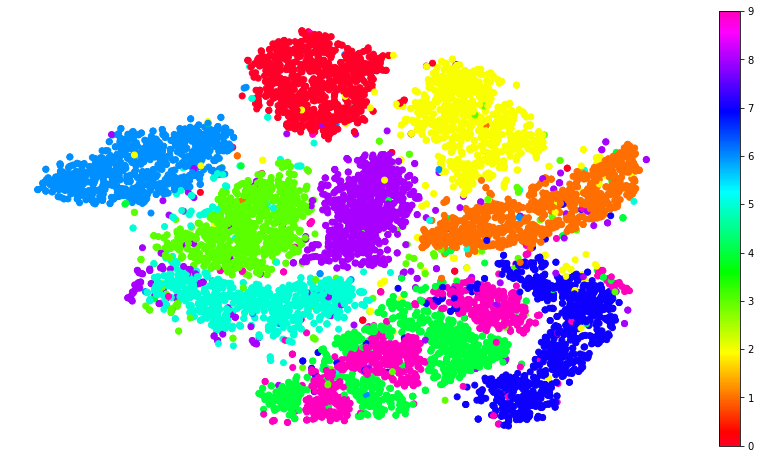

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.scatter(x_plot_reduced[:, 0], x_plot_reduced[:, 1], c=y_plot, cmap="gist_rainbow")
plt.axis("off")
plt.colorbar()
plt.show()

In [22]:
pca_plot = PCA(n_components=2, random_state=24)
x_plot_pca = pca_plot.fit_transform(x_plot)

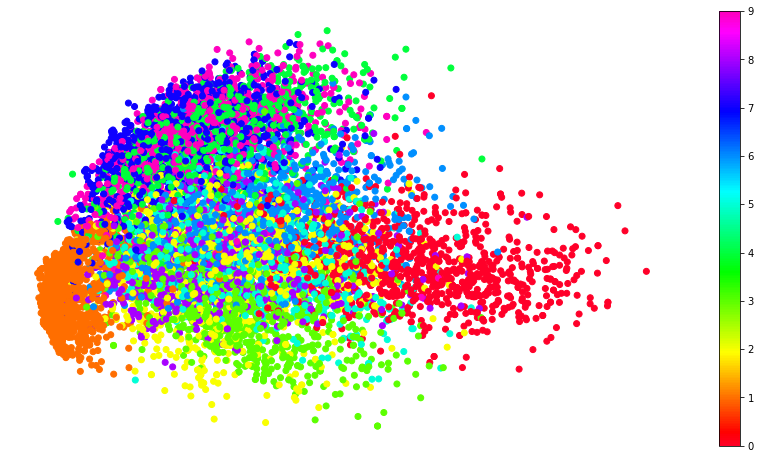

In [23]:
plt.figure(figsize=(15, 8))
plt.scatter(x_plot_pca[:, 0], x_plot_pca[:, 1], c=y_plot, cmap="gist_rainbow")
plt.axis("off")
plt.colorbar()
plt.show()

In [24]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=24)
x_plot_lle = lle.fit_transform(x_plot)

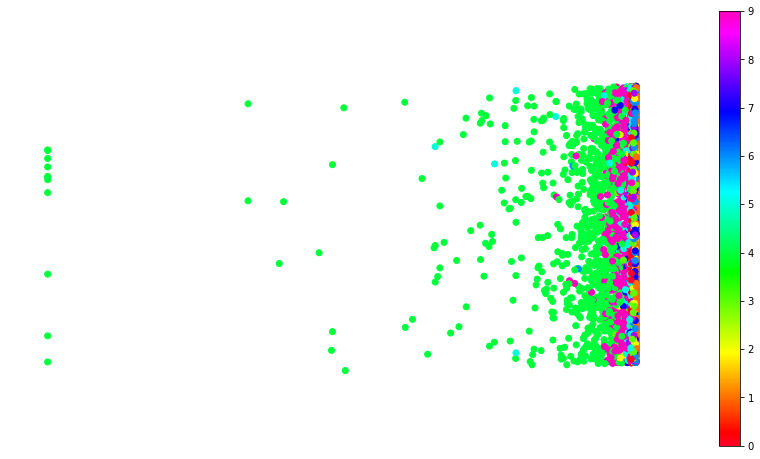

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(x_plot_lle[:, 0], x_plot_lle[:, 1], c=y_plot, cmap="gist_rainbow")
plt.axis("off")
plt.colorbar()
plt.show()

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=24)
x_plot_mds = mds.fit_transfo